# __Conjunto de dados Scada de Turbina Eólica__

---

##  __Objetivo__

Explorar e analisar os dados coletados de turbinas eólicas para entender o desempenho e a eficiência da geração de energia.

---

### __Importando Bibliotecas__

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---

### __Importando DataFrame__

In [371]:
data = pd.read_csv('T1.csv')

---

###   __Tratamento__

In [372]:
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [373]:
#Mudança do nome das colunas
data= data.rename(columns={'Date/Time' : 'Data/Hora', 'LV ActivePower (kW)': 'Potência Gerada', 'Wind Speed (m/s)': 'Velocidade do vento (m/s)' , 'Theoretical_Power_Curve (KWh)': 'Curva_de_Potência_Teórica (KWh):', 'Wind Direction (°)': 'Direção do vento (°)'})


In [374]:
data.head()

,Data/Hora,Potência Gerada,Velocidade do vento (m/s),Curva_de_Potência_Teórica (KWh):,Direção do vento (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [375]:
#Modificando o formato Data e Hora
data['Data/Hora'] = pd.to_datetime(data['Data/Hora'], format="%d %m %Y %H:%M")

In [376]:
data['Data/Hora']

0       2018-01-01 00:00:00
1       2018-01-01 00:10:00
2       2018-01-01 00:20:00
3       2018-01-01 00:30:00
4       2018-01-01 00:40:00
                ...        
50525   2018-12-31 23:10:00
50526   2018-12-31 23:20:00
50527   2018-12-31 23:30:00
50528   2018-12-31 23:40:00
50529   2018-12-31 23:50:00
Name: Data/Hora, Length: 50530, dtype: datetime64[ns]

In [377]:
#Informaões do DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Data/Hora                         50530 non-null  datetime64[ns]
 1   Potência Gerada                   50530 non-null  float64       
 2   Velocidade do vento (m/s)         50530 non-null  float64       
 3   Curva_de_Potência_Teórica (KWh):  50530 non-null  float64       
 4   Direção do vento (°)              50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [378]:
#Verificando se contêm valores nulos
data.isnull().sum()

Data/Hora                           0
Potência Gerada                     0
Velocidade do vento (m/s)           0
Curva_de_Potência_Teórica (KWh):    0
Direção do vento (°)                0
dtype: int64

In [379]:
data.columns

Index(['Data/Hora', 'Potência Gerada', 'Velocidade do vento (m/s)',
       'Curva_de_Potência_Teórica (KWh):', 'Direção do vento (°)'],
      dtype='object')

---

### __Processamento__


__Usamos dados da tabela de entrada como base para o grafíco de scatterplot para ver a relação da Velocidade do vento (m/s) com a Potência Gerada do ano 2018__

<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Potência Gerada'>

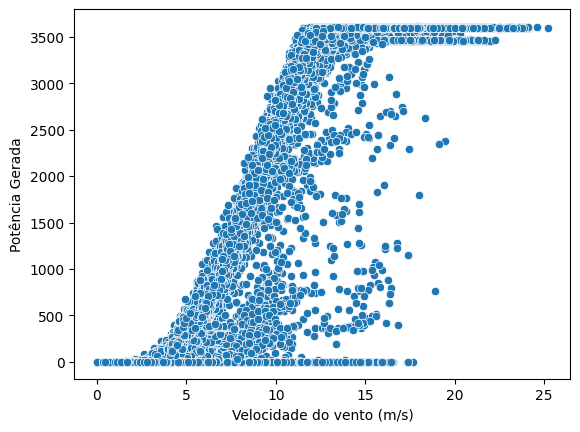

In [380]:
sns.scatterplot(data=data, x='Velocidade do vento (m/s)', y='Potência Gerada')

__Ao analizar o grafico vemos a turbina não esta produzindo a quantidade de energia que deveria estar produzindo em relação a velocidade do vento.__

<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Curva_de_Potência_Teórica (KWh):'>

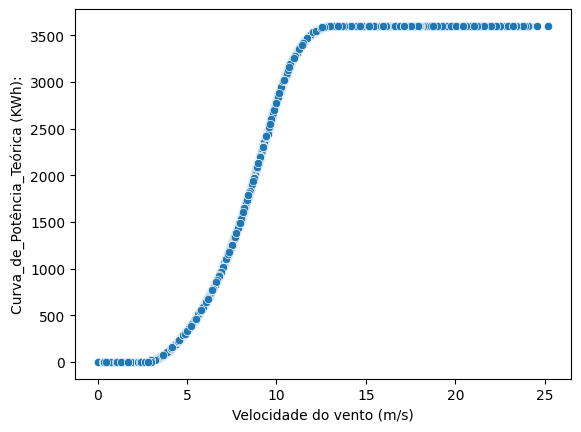

In [381]:
sns.scatterplot(data=data, x='Velocidade do vento (m/s)', y='Curva_de_Potência_Teórica (KWh):')

__Com esse grafíco podemos ver a quantidade ideal de energia que ele deveria estar produzindo__

---

## __Criando limites aceitaveis__


##### __Criaremos uma margem de 5% para cima e 5% para baixo para definir o que será aceitável__

In [ ]:
#Transformando as colunas de um DataFrame para listas
pot_real = data['Potência Gerada'].to_list()
pot_teorica = data['Curva_de_Potência_Teórica (KWh):'].to_list()  

#Separamos o maximo e o minino
pot_max = []
pot_min = []

for potencia in pot_teorica:
    if potencia in pot_teorica:
        pot_max.append(potencia * 1.05)
        pot_min.append(potencia * 0.95)


#Conferindo  se a quantidade de dados é a mesma
len(pot_min), len(pot_max), len(pot_teorica)



(50530, 50530, 50530)

In [383]:
#Separando os valores da potencia gerada usando a margem de 5%
#Valores aceitaveis seram (dentro)
#Valores nao aceitaveis seram (fora)
#Valores zerados considerados manutensão(zero)
dentro_limite = []

for i, potencia in enumerate(pot_real):
    if potencia >= pot_min[i] and potencia <= pot_max[i]:
           dentro_limite.append('dentro')    

    elif potencia ==0:
          dentro_limite.append('zero')

    else:
          dentro_limite.append('fora')



In [384]:
#Divisão de (dentro) por (dentro_limite)
dentro_limite.count('dentro')/len(dentro_limite)

0.37286760340391845

---

## __Adicionando a lista com as informações da margem de 5% ao DataFrame__

In [385]:
data['Dentro limite'] = dentro_limite

In [386]:
data.head()

,Data/Hora,Potência Gerada,Velocidade do vento (m/s),Curva_de_Potência_Teórica (KWh):,Direção do vento (°),Dentro limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,fora


In [387]:
#verificando quais as informaões unicas estão no detro_limite
data['Dentro limite'].unique()

array(['fora', 'dentro', 'zero'], dtype=object)

<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Potência Gerada'>

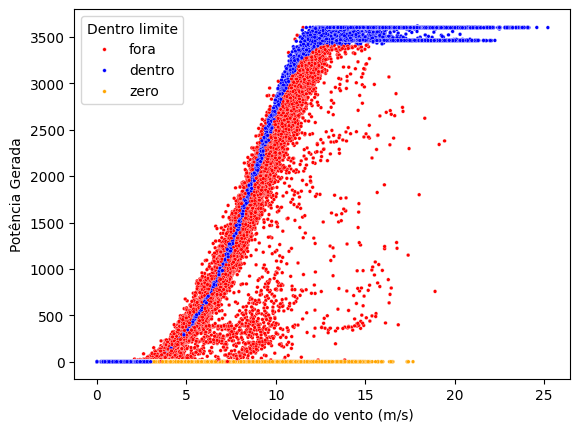

In [388]:
#Adicionando a coluna com as informações da margem usando o (hue)
cores = { 'dentro': 'blue', 'fora': 'red', 'zero': 'orange' }
#Adicionando a variavel cores com o método palette
sns.scatterplot(data=data, x= 'Velocidade do vento (m/s)', y= 'Potência Gerada', hue= 'Dentro limite', s= 7, palette= cores)

---

##  __Análise mensal__

In [389]:
#Separando a coluna Data/Hora em um coluna contendo os meses

data['messs'] = data['Data/Hora'].dt.month


In [390]:
#Adicionando o mês a cada variavel respectiva

jan = data[data["messs"] == 1] 
fev = data[data["messs"] == 2] 
mar = data[data["messs"] == 3]
abr = data[data["messs"] == 4]
mai = data[data["messs"] == 5]
jun = data[data["messs"] == 6]
jul = data[data["messs"] == 7]
ago = data[data["messs"] == 8]
set = data[data["messs"] == 9]
out = data[data["messs"] == 10]
nov = data[data["messs"] == 11]
dez = data[data["messs"] == 12] 


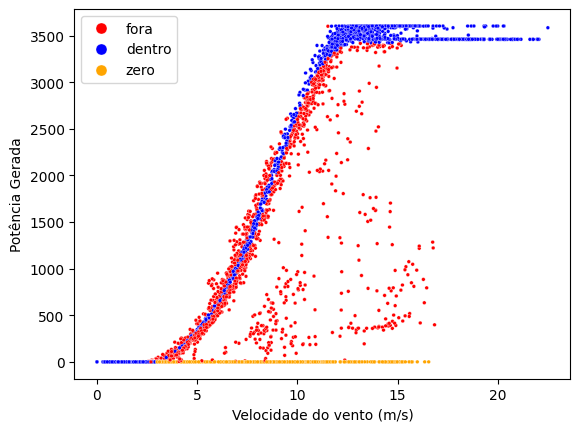

In [391]:
#Análisando o mês de Janeiro

sns.scatterplot(data=jan , x='Velocidade do vento (m/s)', y= 'Potência Gerada', hue= 'Dentro limite' ,s= 7, palette= cores)

plt.legend(markerscale = 3)